In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = load_breast_cancer()
print(type(dataset))
dataset

<class 'sklearn.utils.Bunch'>


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
df=pd.DataFrame(dataset.data, columns= dataset.feature_names)
df['target']=dataset.target
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension   ...    worst texture  worst perimeter  worst area  \
0                 0.07871   ...            17.33           184.60      2019.0   
1                 0.05667   ...            23.41           158.80      1956.0   
2                 0.05999   ...            25.53           152.50      1709.0   
3                 0.09744   ...            26.50            98.87       567.7   
4                 0.05883   ...            16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [4]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension     ...      worst texture  \
count     569.000000              569.000000     ...         569.000000   
mean        0.181162                0.062798     ...          25.677223   
std         0.027414                0.007060     ...           6.146258   
min         0.106000                0.049960     ...          12.020000   
25%         0.161900                0.057700     ...          21.080000   
50%         0.179200                0.061540     ...          25.410000   
75%         0.195700                0.066120     ...          29.720000   
max         0.304000                0.097440     ...          49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [5]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

**Check Datatype of each variable**

In [6]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

#### Get column names

In [7]:
list(df.columns)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

#### Get distribution of the classes in target variable

Frequency Distribution: 
 1    357
0    212
Name: target, dtype: int64
Percentage Distribution: 
 1    63.0
0    37.0
Name: target, dtype: float64


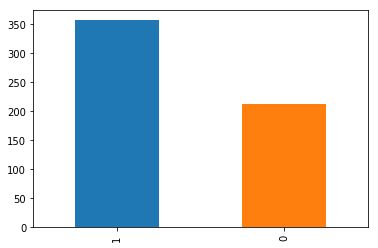

In [9]:
print('Frequency Distribution: \n {}' .format(df['target'].value_counts()))
print('Percentage Distribution: \n {}' .format(round(df['target'].value_counts()/len(df) *100)))
df['target'].value_counts().plot(kind='bar')

### Analyze distribution of each independent variable with respect to the target classes

In [8]:
#Separate the Independent and Dependent Variables
X= df.drop('target', axis='columns')
print(X.shape)
X.head()

(569, 30)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [9]:
y=df.target
print(y.shape)
y.head()

(569,)


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

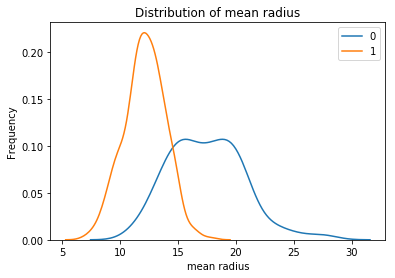

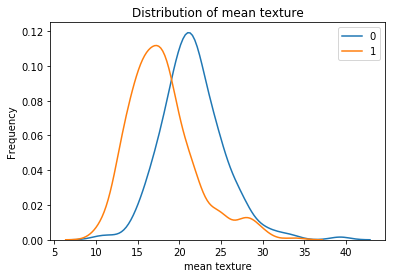

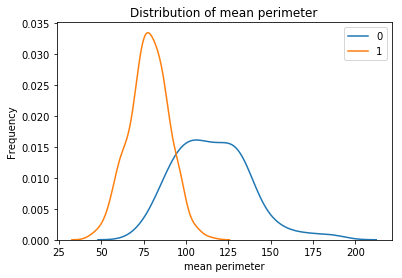

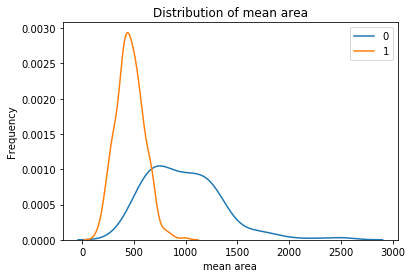

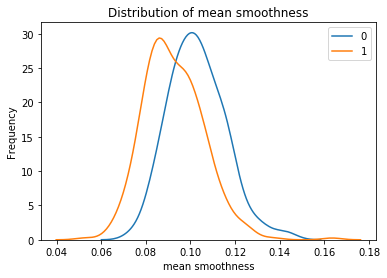

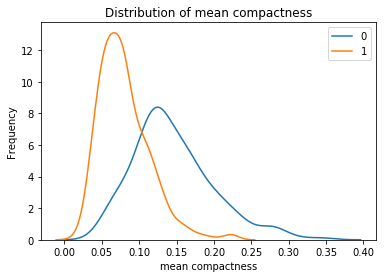

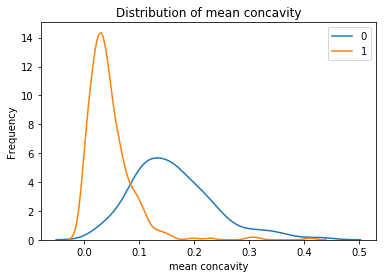

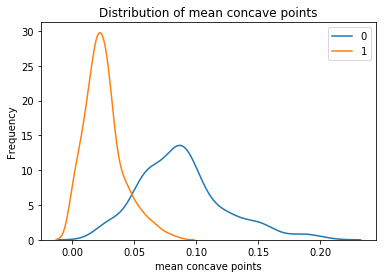

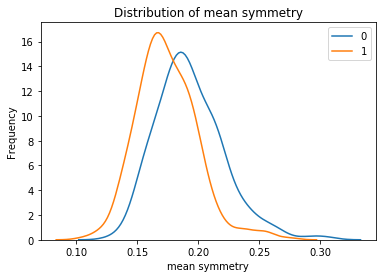

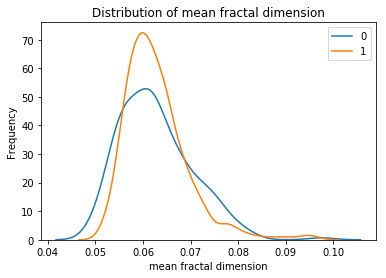

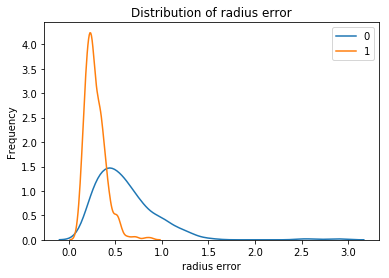

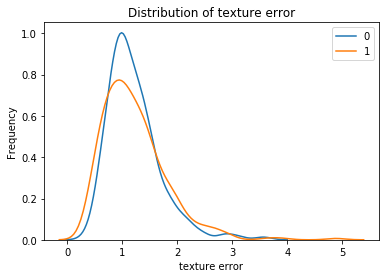

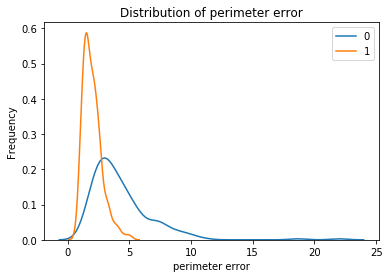

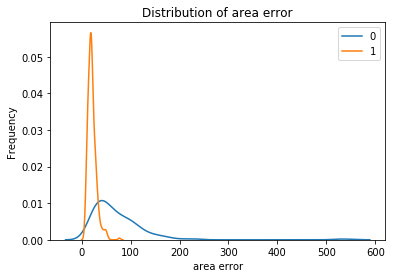

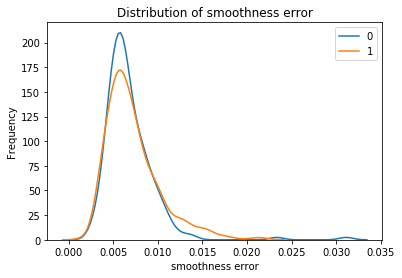

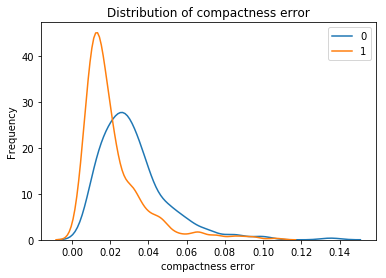

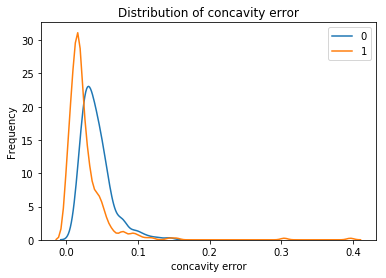

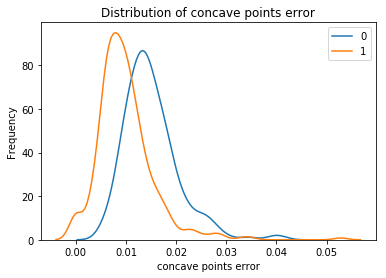

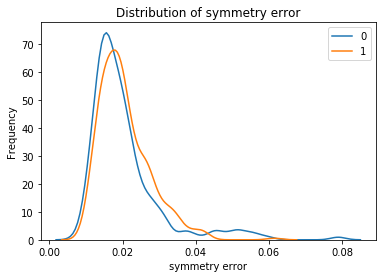

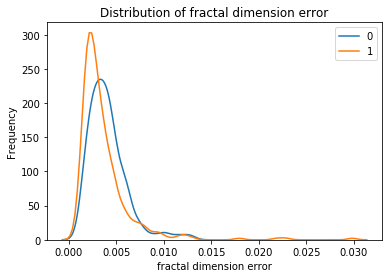

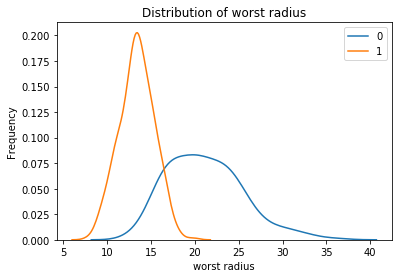

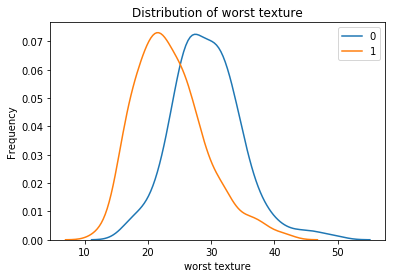

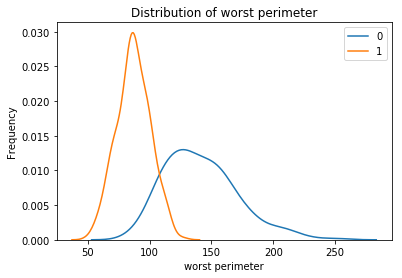

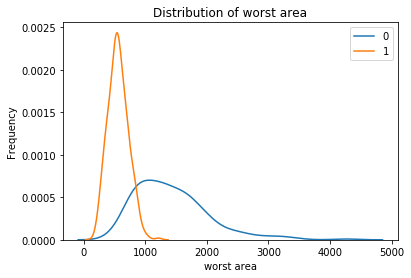

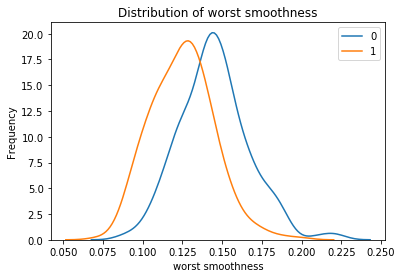

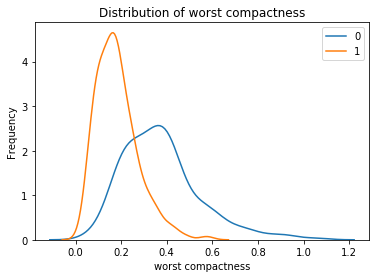

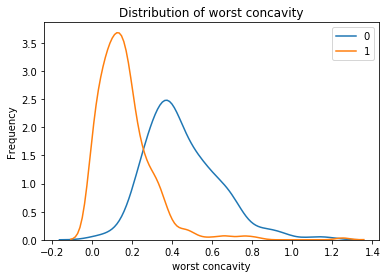

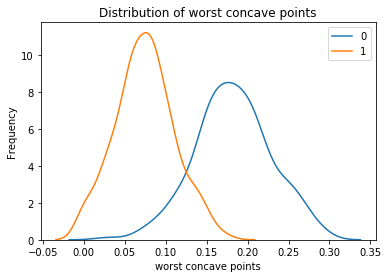

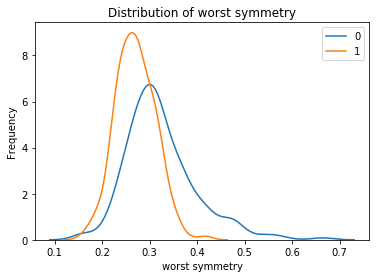

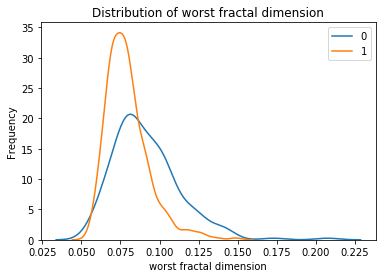

In [39]:
for column in X:
    plt.figure()
    column_data=X[column]
    sns.kdeplot(column_data[y==0], label='0'),
    sns.kdeplot(column_data[y==1], label='1')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'. format(column))

#### Scatterplot of Independent Variables

In [15]:
cols=df.columns.values

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'target'],
      dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


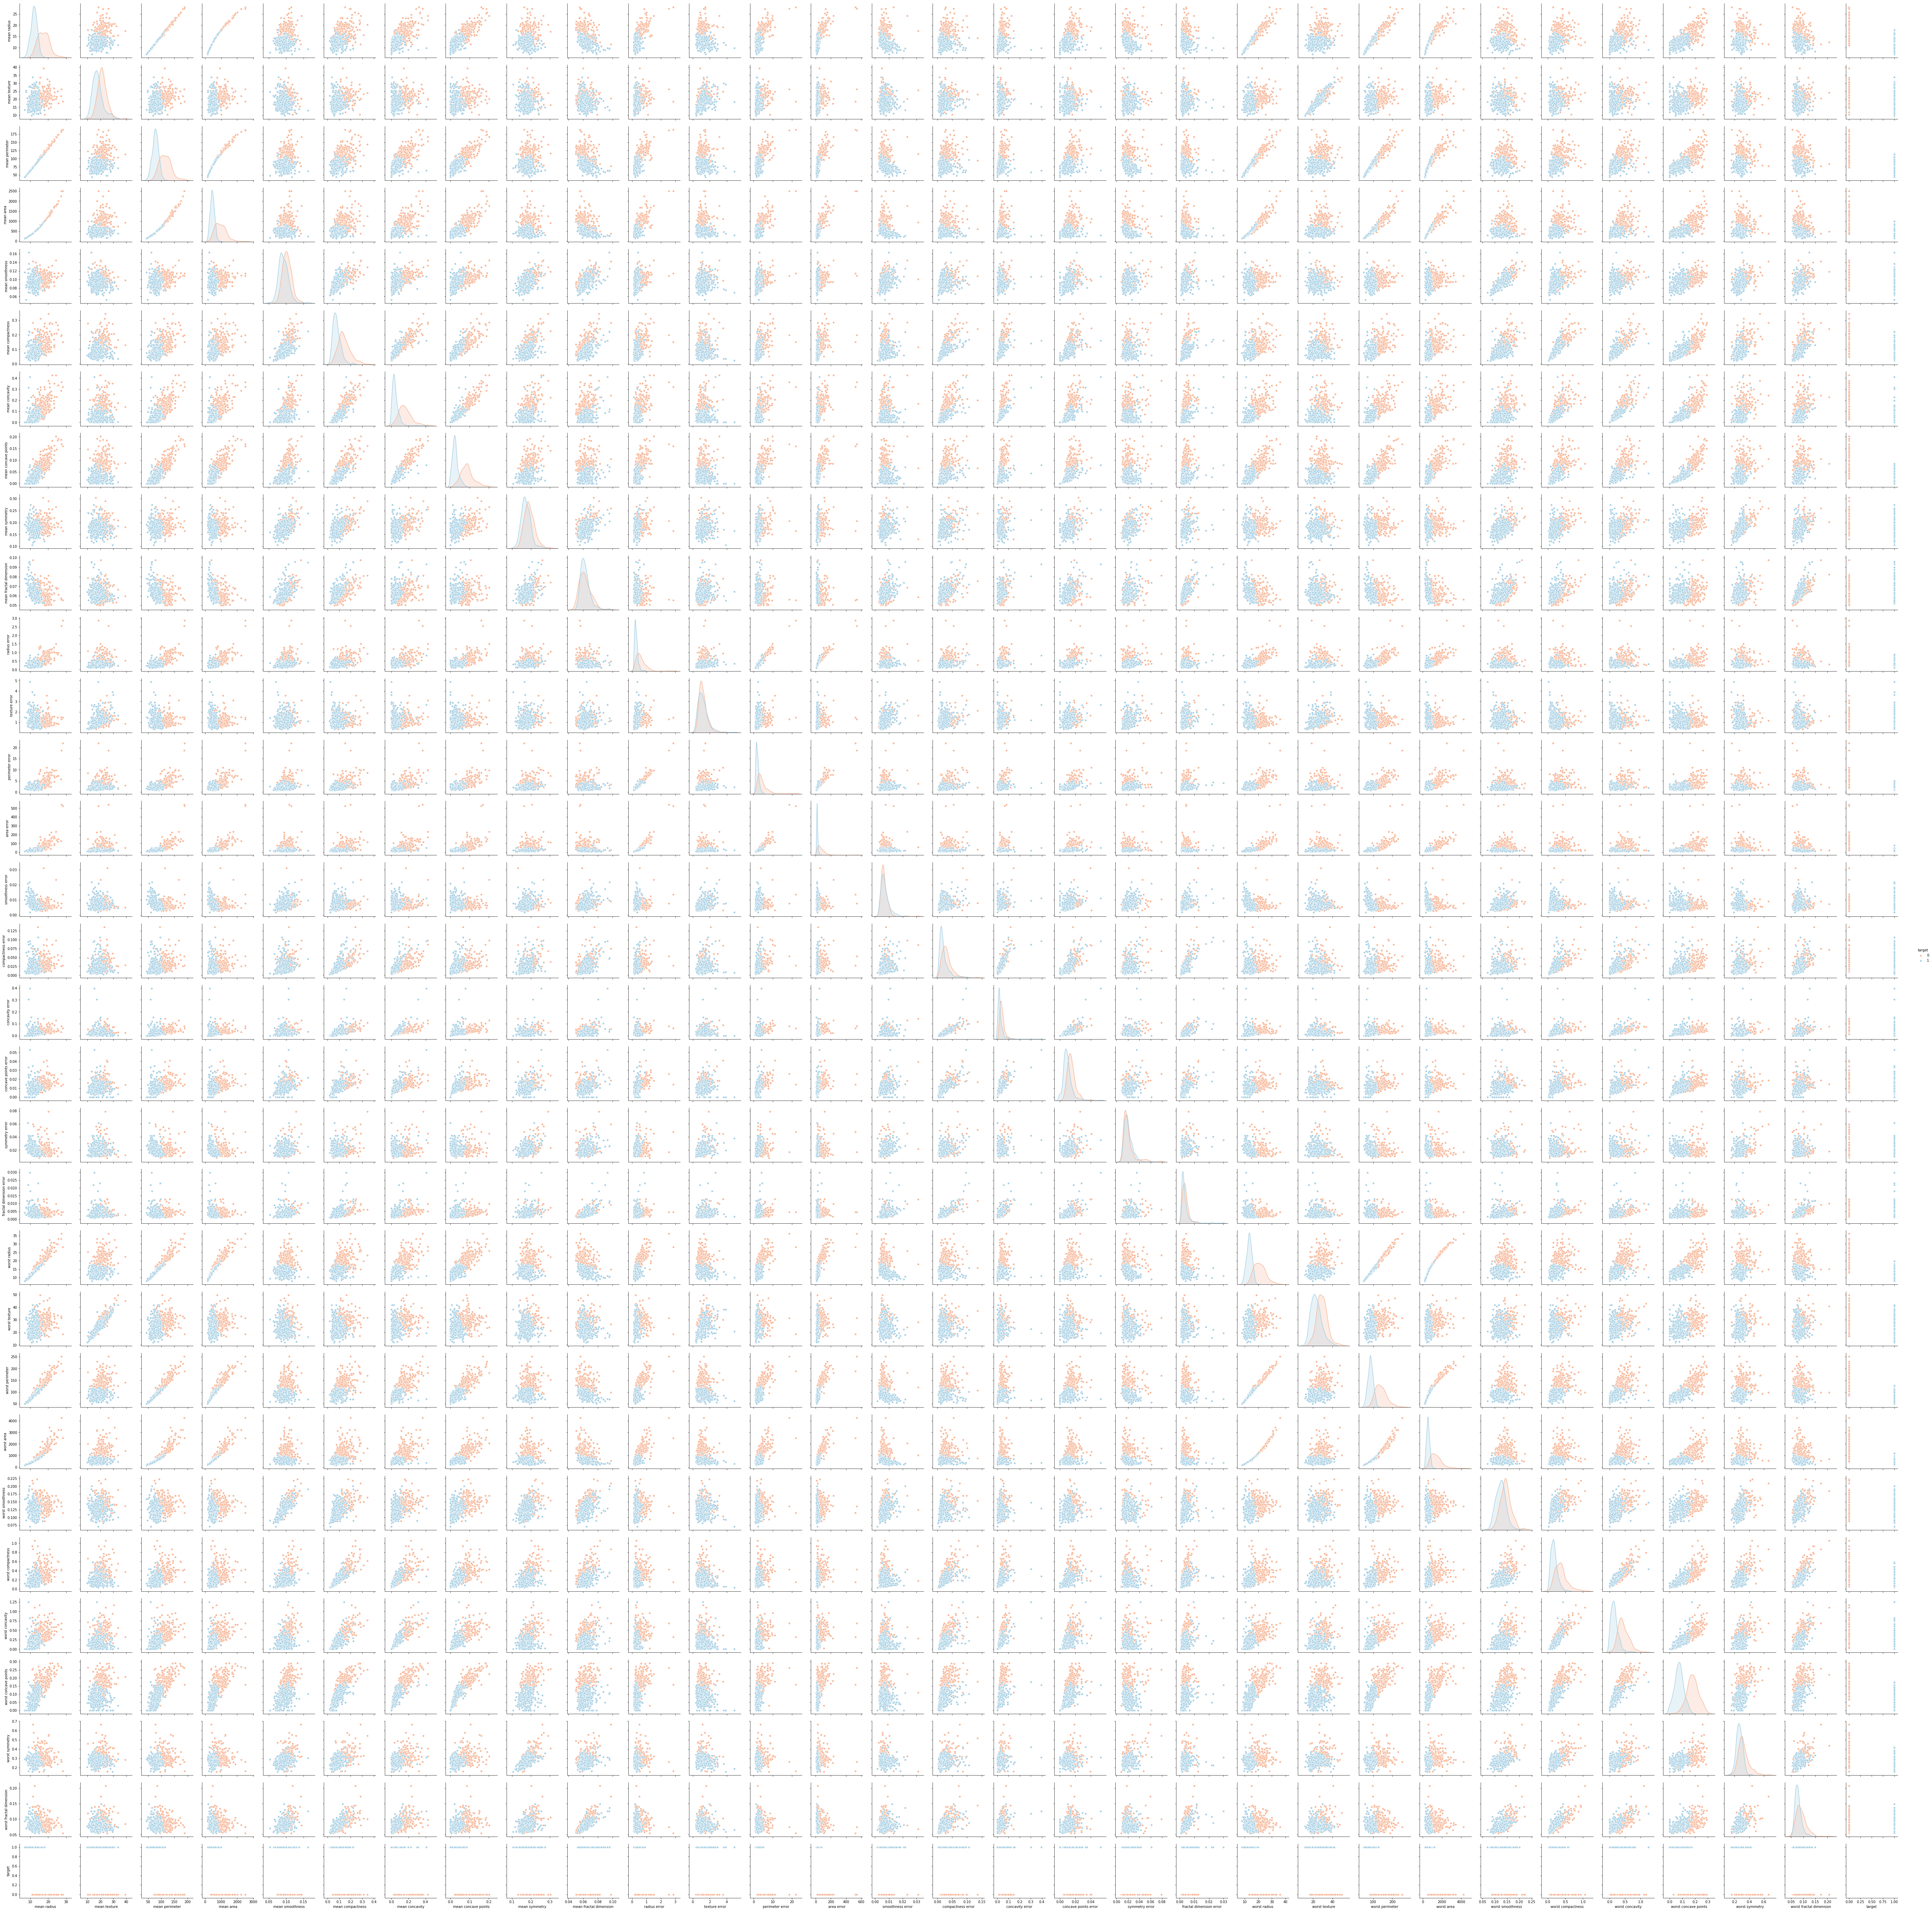

In [16]:
#sns.pairplot(data=df[cols], hue='target', palette='RdBu')

### Correlation between Independent Variables

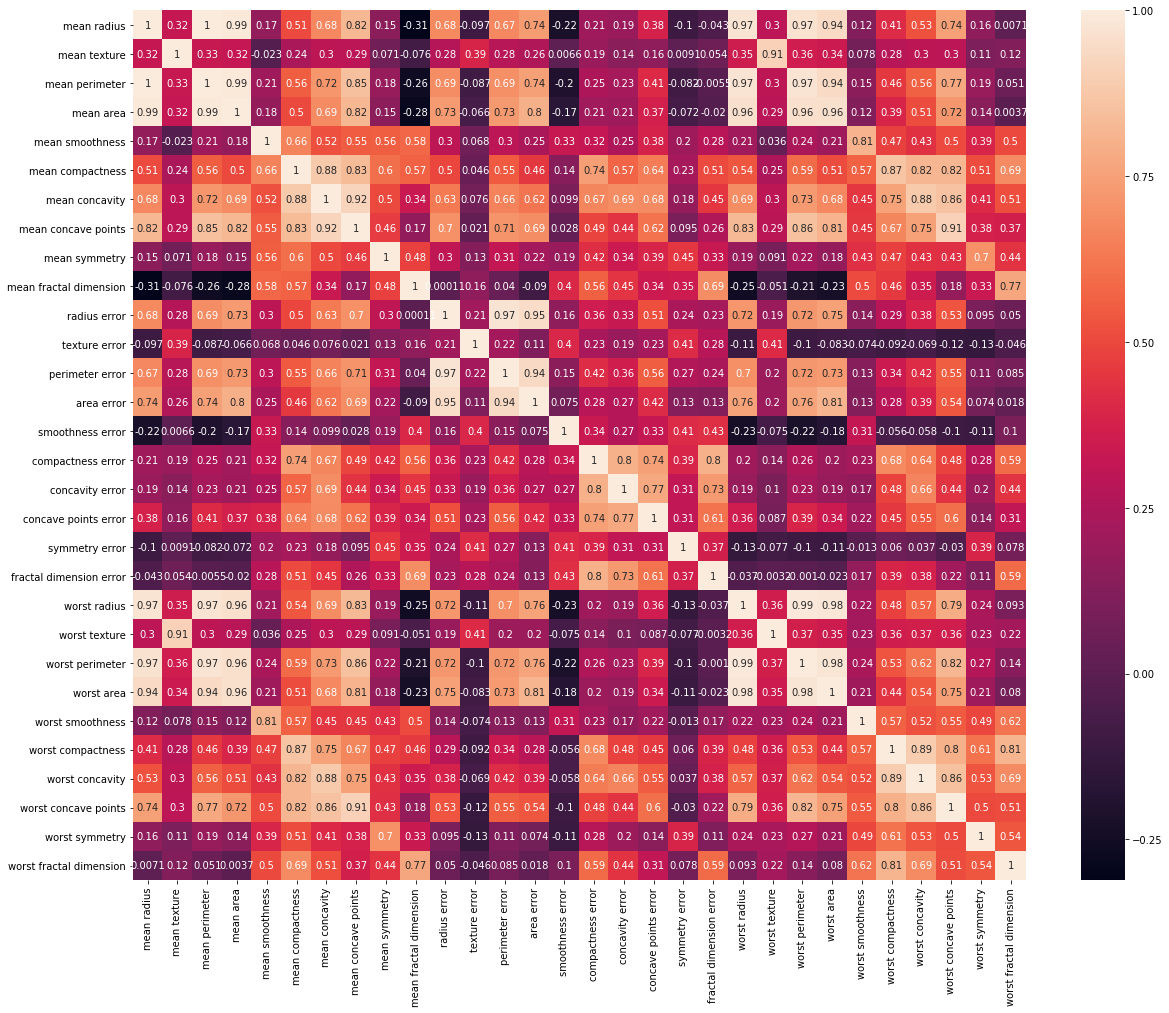

In [30]:
plt.figure(figsize=(20,16))
sns.heatmap(X.corr(), annot=True)

# Model Building

#### Split the dataset into test-train

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=142, stratify=y, test_size= 0.30)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


### Principal Component Analysis

Text(0.5,1,'PCA')

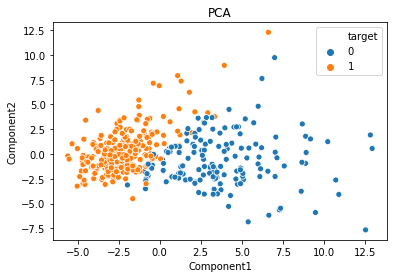

In [13]:
pipe= Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA())
])
X_pca= pipe.fit_transform(X_train,y_train)
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y_train)
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.title('PCA')

### Model 1: KNN

In [31]:
%%time
knn_pipe= Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca',PCA()),
    ('knn',KNeighborsClassifier())
])
# Parameters of pipelines can be set using ‘__’ separated parameter 
parameters= {
    'pca__n_components' : np.arange(1, X_train.shape[1]+1),
    'knn__n_neighbors' : np.arange(1, X_train.shape[1],2),
}
knn_model= GridSearchCV(knn_pipe, param_grid=parameters, verbose=1, n_jobs=-1, scoring='recall', cv= 5)
knn_model.fit(X_train, y_train)
print('Best parameters: {}'. format(knn_model.best_params_))
print('Training Score: {}'. format(knn_model.score(X_train,y_train)))
print('CV Score: {}'.format(knn_model.best_score_))
print('Test Score: {}'. format(knn_model.score(X_test,y_test)))
print('Confusion Matrix for Test Data: \n {}' .format(confusion_matrix(y_test, knn_model.best_estimator_.predict(X_test))))
#Note: knn_model.predict(X_test) is equivalent to knn_model.best_estimator_.predict(X_test)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 1608 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed:  1.2min finished


Best parameters: {'knn__n_neighbors': 13, 'pca__n_components': 11}
Training Score: 0.992
CV Score: 0.9960301507537689
Test Score: 1.0
Confusion Matrix for Test Data: 
 [[ 58   6]
 [  0 107]]
Wall time: 1min 16s


### Model 2: Logistic Regression

In [33]:
%%time
logistic_pipe= Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('pca', PCA()),
    ('logistic', LogisticRegression())
])
parameters= {
    'pca__n_components': np.arange(1,X_train.shape[1]),
    'logistic__C' : np.logspace(0,1,10)
}
logistic_model= GridSearchCV(logistic_pipe, param_grid=parameters , verbose=1, n_jobs=-1, scoring='recall', cv= 5)
logistic_model.fit(X_train,y_train)
print('Training Sore: {}' . format(logistic_model.score(X_train,y_train)))
print('Test Sore: {}' . format(logistic_model.score(X_test,y_test)))
print('Best Parameters: {}' . format(logistic_model.best_params_))
print('Confusion Matrix for Test Data: \n {}' .format(confusion_matrix(y_test, logistic_model.best_estimator_.predict(X_test))))


Fitting 5 folds for each of 290 candidates, totalling 1450 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 1450 out of 1450 | elapsed:   28.9s finished


Training Sore: 0.992
Test Sore: 0.9626168224299065
Best Parameters: {'logistic__C': 1.0, 'pca__n_components': 8}
Confusion Matrix for Test Data: 
 [[ 59   5]
 [  4 103]]
Wall time: 29.7 s


### Model 3: Random Forest

In [34]:
%%time
rdm_pipe= Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('pca',PCA()),
    ('rf', RandomForestClassifier())
])
parameters= {'pca__n_components' : np.arange(1,5),
             'rf__n_estimators': np.arange(200,1001,200),
             'rf__max_depth': np.arange(1,4)
    
}
rdm_model= GridSearchCV(rdm_pipe, param_grid=parameters, verbose=1, n_jobs=-1, scoring='recall', cv= 5)
rdm_model.fit(X_train,y_train)
print('Train Score: {}' . format(rdm_model.score(X_train,y_train)))
print('Test Score: {}' . format(rdm_model.score(X_test,y_test)))
print("Best parameters {}" .format(rdm_model.best_params_))
print('Confusion Matrix for Test Data: \n {}' .format(confusion_matrix(y_test, rdm_model.best_estimator_.predict(X_test))))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


Train Score: 0.96
Test Score: 0.9719626168224299
Best parameters {'pca__n_components': 3, 'rf__max_depth': 1, 'rf__n_estimators': 600}
Confusion Matrix for Test Data: 
 [[ 55   9]
 [  3 104]]
Wall time: 3min 17s


### Model 4: SVM

In [35]:
%%time
svc_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svc', SVC())
])
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1]//3),
    'svc__C': np.logspace(0, 3, 10),
    'svc__kernel': ['rbf'],
    'svc__gamma': np.logspace(-4, -3, 10)
}
svc_model = GridSearchCV(svc_pipe, param_grid=param_grid, verbose=1, n_jobs=-1, cv= 5)
svc_model.fit(X_train, y_train)
print('Best params: {}'.format(svc_model.best_params_
                               int('Training Score: {}'.format(svc_model.score(X_train, y_train)))
print('CV Score: {}'.format(svc_model.best_score_))
print('Test Score: {}'.format(svc_model.score(X_test, y_test)))
print('Confusion Matrix for Test Data: \n {}' .format(confusion_matrix(y_test, svc_model.best_estimator_.predict(X_test))))

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 3942 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  1.2min finished


Best params: {'pca__n_components': 9, 'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Training Score: 0.9899497487437185
CV Score: 0.9899497487437185
Test Score: 0.9532163742690059
Confusion Matrix for Test Data: 
 [[ 59   5]
 [  3 104]]
Wall time: 1min 12s


### Model 5: XGBoost

In [41]:
%%time
xgb_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
#     ('pca', PCA()),
    ('xgb', XGBClassifier())
])
param_grid = {
#     'pca__n_components': np.arange(1, X_train.shape[1]//3),
    'xgb__n_estimators': [100],
    'xgb__learning_rate': np.logspace(-3, 0, 10),
    'xgb__max_depth': np.arange(1, 6),
    'xgb__gamma': np.arange(0, 1.0, 0.1),
    'xgb__reg_lambda': np.logspace(-3, 3, 10)
}
xgb_model = GridSearchCV(xgb_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
xgb_model.fit(X_train, y_train)
print('Best params: {}'.format(xgb_model.best_params_))
print('Training Score: {}'.format(xgb_model.score(X_train, y_train)))
print('CV Score: {}'.format(xgb_model.best_score_))
print('Test Score: {}'.format(xgb_model.score(X_test, y_test)))
print('Confusion Matrix for Test Data: \n {}' .format(confusion_matrix(y_test, xgb_model.best_estimator_.predict(X_test))))

Fitting 3 folds for each of 5000 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 12792 tasks      | elapsed: 19

Best params: {'xgb__gamma': 0.0, 'xgb__learning_rate': 1.0, 'xgb__max_depth': 1, 'xgb__n_estimators': 100, 'xgb__reg_lambda': 2.154434690031882}
Training Score: 1.0
CV Score: 0.9748743718592965
Test Score: 0.935672514619883


TypeError: 'numpy.ndarray' object is not callable

### Making Predictions on Test Data

In [37]:
#The best model is KNN
#So we will use KNN to make our predicitions
y_pred = knn_model.best_estimator_.predict(X_test)
confusion_matrix= confusion_matrix(y_test,y_pred)
print("confusion matrix: \n {} " .format(confusion_matrix))
print("Classification Report: \n {}" .format(classification_report(y_test, y_pred)))

confusion matrix: 
 [[ 58   6]
 [  0 107]] 
Classification Report: 
              precision    recall  f1-score   support

          0       1.00      0.91      0.95        64
          1       0.95      1.00      0.97       107

avg / total       0.97      0.96      0.96       171

